In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import itertools as it
import scipy.special as psi
plt.style.use('classic')
import seaborn as sns
import pandas as pd
import math as mt
import time
import sys

sys.path.insert(1, '/rds/general/user/lr4617/home/4th_Year_Project/Final_Year_Project/')

from scipy.io import loadmat
from scipy import stats
from numpy.random import seed
from numpy.random import rand
from scipy.integrate import quad
from scipy.io import savemat
from tempfile import TemporaryFile
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.decomposition import KernelPCA
from mpl_toolkits import mplot3d
from mPE_fn import mPE_
from scipy.spatial import distance
from scipy.stats import entropy
from mPE_ultis import integrand, ubble, array_list, permutation
from util import rolling_mean, probability, probability_v2, get_mPE_matrix
from sklearn.cluster import KMeans
sns.color_palette("colorblind")


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## mPE vs Time Analysis - MACRO 

In [12]:
mode = 'normal'
n_PC = 2
eval_step = 'result'

path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time/macro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/' + 'mPE/'
mPE_specs = os.listdir(path)
path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/'

###############################################
######## mPE distribution vs time plot ########
###############################################

labels_each = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']

if mode == 'normal':
    fig, axs = plt.subplots(1,4, figsize=(20, 6))
    l = []
    labels = ['First Half', 'Second Half']
    for idx, ii in enumerate(mPE_specs):
        mPE_vector = np.load(path + ii)
        a1 = sns.kdeplot(mPE_vector[0, :, 0], ax=axs[idx], color="blue", shade=False)
        l.append(a1)
        a2 = sns.kdeplot(mPE_vector[1, :, 0], ax=axs[idx], color="red", shade=False)
        l.append(a2)
        
        axs[idx].set_xlabel('')
        axs[idx].set_ylabel('')
        axs[idx].grid(axis='y', alpha=0.75)
        axs[idx].text(-0.05, 1.06, labels_each[idx], transform=axs[idx].transAxes, fontsize=13, fontweight='bold', va='top', ha='right') 

    fig.legend(l, labels=labels, loc=(0.43, 0.965), ncol=2, fontsize='11', frameon=False)
    fig.text(0.5, 0.02, 'Order 3 mPE (bits)', ha='center')
    fig.text(0.09, 0.5, 'Estimated Density Function', va='center', rotation='vertical')
    
    plt.savefig(path_out + 'test_normal.png')
    
    fig.show()

    
else:
    fig, axs = plt.subplots(2,4, figsize=(20, 7))
    l = []
    labels = ['First Half', 'Second Half']
    for idx, ii in enumerate(mPE_specs):
        cnt = idx
        if idx <=3:
            idx1 = 0
        else:
            idx = idx - 4
            idx1 = 1
            
        mPE_vector = np.load(path + ii)
        a1 = sns.kdeplot(mPE_vector[0, :, 0], ax=axs[idx1, idx], color="blue", shade=False)
        l.append(a1)
        a2 = sns.kdeplot(mPE_vector[1, :, 0], ax=axs[idx1, idx], color="red", shade=False)
        l.append(a2)
        
        axs[idx1, idx].set_xlabel('')
        axs[idx1, idx].set_ylabel('')
        axs[idx1, idx].grid(axis='y', alpha=0.75)
        axs[idx1, idx].text(-0.05, -0.8, labels[cnt], transform=axs[i, j].transAxes, fontsize=16, fontweight='bold', va='top', ha='right') 
        
    fig.legend(l, labels=labels, loc="upper center", ncol=2, fontsize='11', frameon=False)
    fig.text(0.5, 0.02, 'Order [3] mPE (bits)', ha='center')
    fig.text(0.08, 0.5, 'Estimated Density Function', va='center', rotation='vertical')
    
    plt.savefig(path_out + 'test_drug.png')

    fig.show()

        

/rds/general/user/lr4617/home/anaconda3/envs/prj_env_conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


Error in callback <function flush_figures at 0x1472fed07200> (for post_execute):


KeyboardInterrupt: 

## p-value Analysis - MACRO

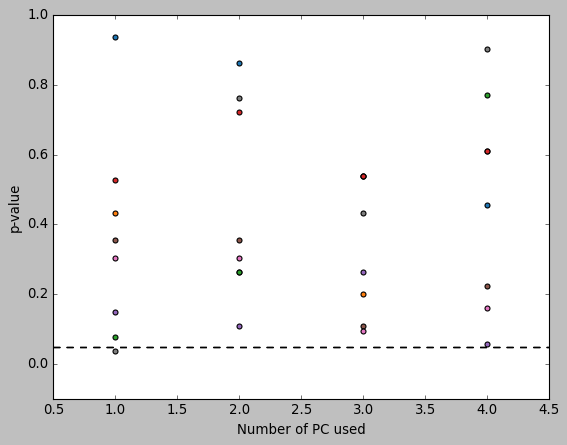

In [10]:
mode = 'drug'
n_PC = 3
eval_step = 'result'

path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time/macro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/' + 'mPE/'
mPE_specs = os.listdir(path)
path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/'

if mode == 'drug':
    p_values = np.zeros((8,4))
if mode == 'normal':
    p_values = np.zeros((4,4))

for n_PC in range(1,5):

    path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time/macro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/' + 'mPE/'

    for idx, ii in enumerate(mPE_specs):

        mPE_vector = np.load(path + ii)

        ########## Retrieve maxiumum number of elements based on k-means discretization ##########
        data = mPE_vector.flatten()
        kmeans = KMeans(n_clusters=15).fit(data.reshape(-1,1))
        kmeans.predict(data.reshape(-1,1))
        centroids = kmeans.cluster_centers_
        centroids = [centroids[i] for i in range(len(centroids))]
        centroids = np.asarray(centroids)

        prob1 = probability_v2(mPE_vector[0, :, 0], centroids)
        prob2 = probability_v2(mPE_vector[1, :, 0], centroids)

        js_distance = distance.jensenshannon(prob1, prob2)
        [stat, p_value] = stats.ks_2samp(mPE_vector[0, :, 0], mPE_vector[1, :, 0])

        p_values[idx, n_PC-1] = p_value

cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in range(8):
    plt.scatter(np.arange(1,5), p_values[i, :], c=cs[i])
    plt.axhline(y=0.05, color="black", linestyle="--")
    plt.xlabel('Number of PC used')
    plt.ylabel('p-value')
    plt.ylim([-0.1, 1])
plt.show()

## mPE vs Time Analysis - MICRO

In [11]:
mode = 'drug'
n_PC = 3
eval_step = 'result'
n_clusters_kmeans = 15
significance_level = 0.05

path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time/micro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/'
mPE_specs = os.listdir(path)
path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/'

mode_spec = 'caffeine'

if mode == 'normal':
    max_idx = 15
elif mode == 'drug':
    max_idx = 6


if mode_spec == 'amphetamine':
    trajs = ['traj_1.npy', 'traj_3.npy', 'traj_5.npy', 'traj_7.npy']
else:
    trajs = ['traj_2.npy', 'traj_4.npy', 'traj_6.npy', 'traj_8.npy']

for i, result in enumerate(mPE_specs):
    
    traj_mPE = np.load(path + result)
    print(traj_mPE.shape)
    
    if mode == 'drug' and result in trajs:
        if i == 1 and mode_spec == 'amphetamine':
            traj_mPE_ = np.zeros((max_idx,15))
            traj_mPE_[0:3, :] = traj_mPE[:, :, 0]
            traj_mPE_[3:max_idx, :] = traj_mPE_
            traj_mPE = traj_mPE_
        else:
            traj_mPE = traj_mPE[0:max_idx, :, 0]
    else:
        traj_mPE = traj_mPE[0:max_idx, :, 0]
        
    if i==0:
        mPE_vector = traj_mPE
    else:
        mPE_vector = np.concatenate((mPE_vector, traj_mPE), axis=1)

########## Retrieve maxiumum number of elements based on k-means discretization ##########
data = mPE_vector.flatten()
kmeans = KMeans(n_clusters=n_clusters_kmeans).fit(data.reshape(-1,1))
kmeans.predict(data.reshape(-1,1))
centroids = kmeans.cluster_centers_
centroids = [centroids[i] for i in range(len(centroids))]
centroids = np.asarray(centroids)

########## plotting mPE continuous distribution as a function of time ##########        
fig = plt.figure()

bins_number = mPE_vector.shape[0]
compare_to = mPE_vector[0, :]

p_value_array = np.zeros((bins_number-1, ))
js_array = np.zeros((bins_number-1, ))
means = np.zeros((bins_number, ))
means[0] = np.mean(compare_to)
stds = np.zeros((bins_number, ))
stds[0] = np.std(compare_to)

for bin_n in range(1, bins_number):
    [_, p_value] = stats.ks_2samp(mPE_vector[bin_n, :], compare_to)
    print(p_value)
    p_value_array[bin_n -1] = p_value

    prob1 = probability_v2(compare_to, centroids)
    prob2 = probability_v2(mPE_vector[bin_n, :], centroids)

    js_distance = distance.jensenshannon(prob1, prob2)
    js_array[bin_n - 1] = js_distance 
    
    if p_value <= significance_level:
        ax = sns.kdeplot(mPE_vector[bin_n, :])
        ax = sns.kdeplot(mPE_vector[bin_n-1, :])
        compare_to = mPE_vector[bin_n, :]

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Order [3] mPE (bits)')
plt.ylabel('Estimated Density Function')

(6, 15, 1)
(6, 15, 1)
(6, 15, 1)
(6, 15, 1)
(6, 15, 1)
(3, 15, 1)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 6 and the array at index 1 has size 3

## mPE BIAS ANALYSIS

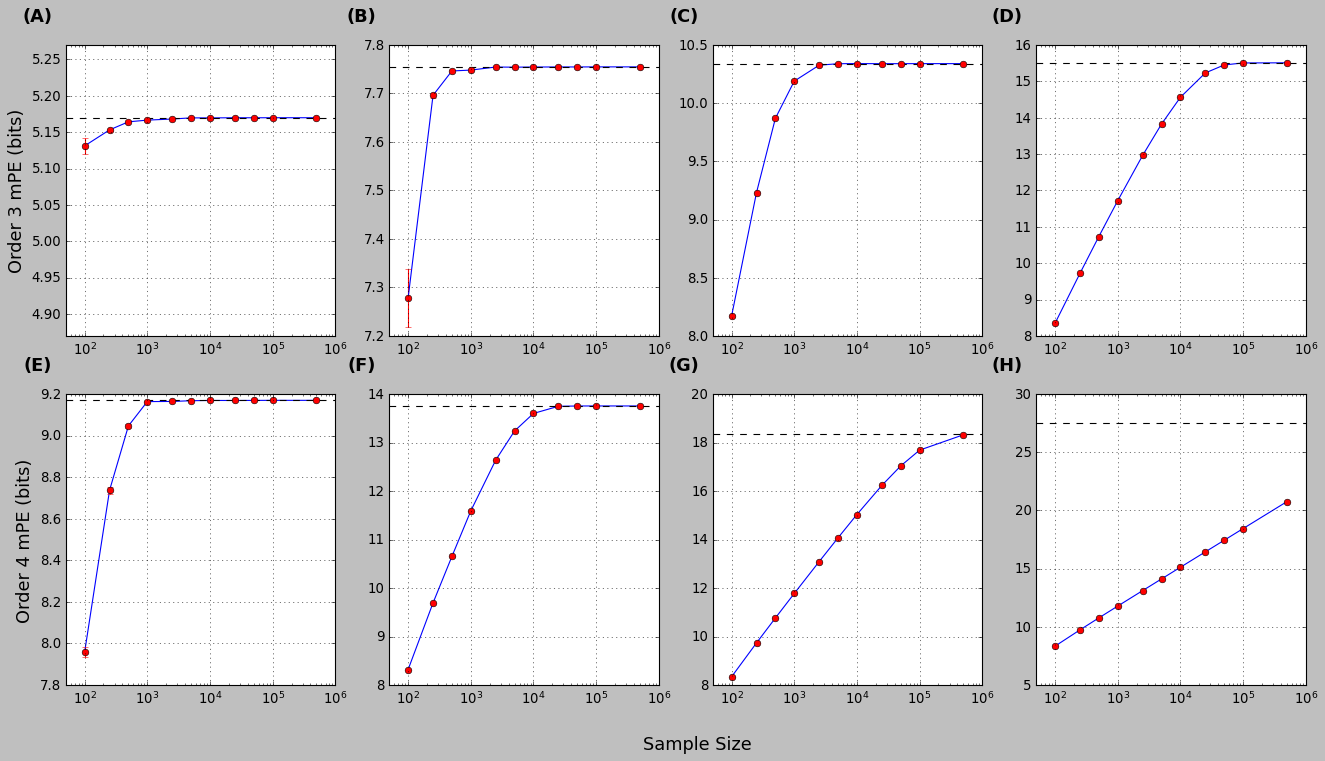

In [15]:
bias_data = np.load('/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/control_analysis/bias_reduction_data.npy')

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

labels = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']
sizes = [100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000, 500000]
n_PCs = [2,3,4,6]

# convergence analysis over 20 trials
for j in range(bias_data.shape[2]):
    cnt = j
    if j <=3:
        order = 3
        i = 0
        H_bound = np.log2(mt.factorial(order)**n_PCs[j])
    else:
        order = 4
        j = j - 4
        i = 1
        H_bound = np.log2(mt.factorial(order)**n_PCs[j])
        
    sample_H = bias_data[:, :, cnt]
    axs[i, j].plot(sizes, np.mean(sample_H, axis=0))
    axs[i, j].errorbar(sizes, np.mean(sample_H, axis=0), yerr=np.var(sample_H, axis=0), fmt="o", color="r")
    axs[i, j].axhline(y=H_bound, color="black", linestyle="--")
    if j == 0:
        axs[i, j].set_ylabel('Order ' + str(order) + ' mPE (bits)', fontsize=16)
    else:
        axs[i, j].set_ylabel('')

    axs[i, j].set_xscale("log")
    axs[i, j].set_xlim([50, 1e06])

    x_min, x_max, y_min, y_max = axs[i, j].axis()
    if y_max - y_min < 0.3:
        axs[i][j].set_ylim([H_bound - 0.3,  + H_bound + 0.1])
    axs[i, j].grid(True, which="major")
    axs[i, j].text(-0.05, 1.13, labels[cnt], transform=axs[i, j].transAxes, fontsize=16, fontweight='bold', va='top', ha='right') 


    cnt += 1

fig.text(0.52, 0.02, 'Sample Size', fontsize=16, ha='center')
fig.show()
name_out = 'bias_reduction_2'
path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/control_analysis/'
plt.savefig(path_out +  name_out  + ".eps")

## MARKER DMI ANALYSIS

In [12]:
marker_DMI = np.load('/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/dmi_analysis/marker_DMI.npy')
for i in range(marker_DMI.shape[0]):
    DMI = marker_DMI[i, :]
    DMI_sorted = np.sort(DMI)
    print(DMI_sorted.shape)
    max_3 = np.argwhere(DMI > DMI_sorted[16]).flatten()
    print(max_3)
print(marker_DMI)

(20,)
[ 3 12 13]
(20,)
[12 13 14]
(20,)
[10 13 14]
(20,)
[3 4 6]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
(20,)
[ 3  6 12]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
(20,)
[ 3  6 13]
[[0.30434355 0.32522081 0.30598666 0.58535306 0.38175099 0.22380767
  0.49160051 0.34488481 0.20329773 0.18866945 0.41535078 0.32967663
  0.51495841 0.55305848 0.48032112 0.40793352 0.15324096 0.26228891
  0.22290128 0.13238132]
 [0.12552147 0.1449656  0.14321198 0.39116516 0.3639756  0.29728351
  0.33808782 0.31377745 0.22240033 0.2207423  0.38447214 0.32892402
  0.42961077 0.46139464 0.40245434 0.34924152 0.15941643 0.15962454
  0.17617634 0.16555578]
 [0.16338162 0.17391864 0.17773171 0.27651036 0.15508746 0.18620372
  0.18685832 0.15381864 0.15628108 0.11699819 0.29751849 0.25086525
  0.29318023 0.3162151  0.29377869 0.26488734 0.14384225 0.12617695
  0.13431078 0.13375211]
 [0.21562149 0.2784391  0.27543075 0.54531338 0.52163404 0.39083373
  0.52135183 0.45648838 0.3041319  0.2506747

In [8]:
lst = ['traj_1', 'traj_5', 'traj_3']
lst.sort()
print(lst)

['traj_1', 'traj_3', 'traj_5']


In [ ]:
{'HeadF'    }
{'HeadB'    }
{'HeadL'    }
{'SpineF'   }
{'SpineM'   }
{'SpineL'   }
{'Offset1'  }
{'Offset2'  }
{'HipL'     }
{'HipR'     }
{'ElbowL'   }
{'ArmL'     }
{'ShoulderL'}
{'ShoulderR'}
{'ElbowR'   }
{'ArmR'     }
{'KneeR'    }
{'KneeL'    }
{'ShinL'    }
{'ShinR'    }
